In [2]:
import sqlite3 as db
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime


In [16]:
data = {
    'Item Name': ['Apples', 'Milk', 'Bread', 'Eggs', 'Bananas', 'Cheese', 'Tomatoes', 'Potatoes', 'Onions', 'Chicken', 'Pasta', 'Rice', 'Bread', 'Yogurt', 'Ice Cream', 'Cereal'],
    'Quantity': [5, 1, 1, 3, 5, 2, 3, 4, 1, 2, 3, 2, 2, 2, 1, 3],
    'Unit Price': [1.5, 2.0, 4.0, 0.2, 1.0, 3.0, 1.2, 0.5, 0.8, 5.0, 2.5, 1.0, 4.0, 4.0, 2.0, 1.0],
    'Purchase Date': [
        datetime(2024, 4, 1),
        datetime(2024, 4, 2),
        datetime(2024, 4, 2),
        datetime(2024, 4, 3),
        datetime(2024, 4, 4),
        datetime(2024, 4, 3),
        datetime(2024, 4, 2),
        datetime(2024, 4, 4),
        datetime(2024, 4, 5),
        datetime(2024, 4, 5),
        datetime(2024, 4, 3),
        datetime(2024, 4, 1),
        datetime(2024, 4, 6),
        datetime(2024, 4, 6),
        datetime(2024, 4, 6),
        datetime(2024, 4, 5)],
    'Category': ['Fruits', 'Dairy', 'Bakery & Grains', 'Dairy', 'Fruits', 'Dairy', 'Vegetables', 'Vegetables', 'Vegetables', 'Meat', 'Bakery & Grains', 'Bakery & Grains', 'Bakery & Grains', 'Diary', 'Desserts', 'Bakery & Grains']
}

In [18]:
#Create a Stacked Bar Chart with matplotlib showing the quantity of items sold by date and category
def visualize(df):
    df['Purchase Date'] = pd.to_datetime(df['Purchase Date']).dt.date # set datatype as date

    grouped_df = df.groupby(['Purchase Date', 'Category'])['Quantity'].sum().reset_index()
    pivot_df = grouped_df.pivot(index = 'Purchase Date', columns = 'Category', values = 'Quantity').fillna(0)

    categories = pivot_df.columns
    bottom = np.zeros(len(pivot_df.index))

    plt.figure(figsize = (10, 6))
    for category in categories:
        plt.bar(pivot_df.index, pivot_df[category], bottom = bottom, label = category)
        bottom += np.array(pivot_df[category])

    plt.xlabel('Purchase Date')
    plt.ylabel('Quantity')
    plt.title('Quantity of Items Sold by Date and Category')
    plt.legend(title = 'Category')
    plt.tight_layout()

    plt.savefig('generate_plot.png')
    return

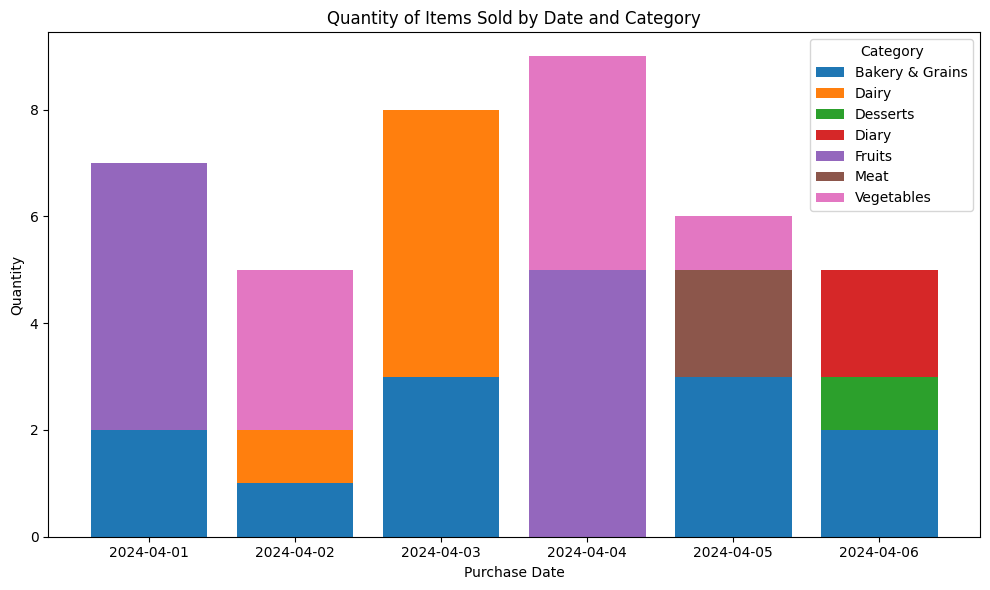

In [19]:
df = pd.DataFrame(data)
result = visualize(df)


In [20]:
df

,Item Name,Quantity,Unit Price,Purchase Date,Category
0,Apples,5,1.5,2024-04-01,Fruits
1,Milk,1,2.0,2024-04-02,Dairy
2,Bread,1,4.0,2024-04-02,Bakery & Grains
3,Eggs,3,0.2,2024-04-03,Dairy
4,Bananas,5,1.0,2024-04-04,Fruits
5,Cheese,2,3.0,2024-04-03,Dairy
6,Tomatoes,3,1.2,2024-04-02,Vegetables
7,Potatoes,4,0.5,2024-04-04,Vegetables
8,Onions,1,0.8,2024-04-05,Vegetables
9,Chicken,2,5.0,2024-04-05,Meat


In [6]:
#Connect to database
conn = db.connect('db/sqlite.db')

cursor = conn.cursor()

In [7]:
#Create table
create_table = "CREATE TABLE IF NOT EXISTS sales (Item Name NVARCHAR(50), Quantity INTEGER, Unit Price INTEGER, Purchase Date INTEGER, Category NVARCHAR(50))"
cursor.execute(create_table)

In [8]:
#Validate if table is created
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
print(cursor.fetchall())

[('employees',), ('sales',)]


In [21]:
#Insert dataframe into sales table
df.to_sql(name = 'sales', con = conn, if_exists = 'replace', index = False)
conn.commit()

In [ ]:
#Validate if the data is successfully inserted
sales_data = pd.read_sql_query('SELECT * FROM sales', conn)

sales_data

,Item Name,Quantity,Unit Price,Purchase Date,Category
0,Apples,5,1.5,2024-04-01,Fruits
1,Milk,1,2.0,2024-04-02,Dairy
2,Bread,1,4.0,2024-04-02,Bakery & Grains
3,Eggs,3,0.2,2024-04-03,Dairy
4,Bananas,5,1.0,2024-04-04,Fruits
5,Cheese,2,3.0,2024-04-03,Dairy
6,Tomatoes,3,1.2,2024-04-02,Vegetables
7,Potatoes,4,0.5,2024-04-04,Vegetables
8,Onions,1,0.8,2024-04-05,Vegetables
9,Chicken,2,5.0,2024-04-05,Meat
